In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# to work with rasters
# https://rasterio.readthedocs.io/en/latest/quickstart.html#opening-a-dataset-in-reading-mode
import rasterio
from rasterio.plot import show
from rasterio.features import shapes

import pprint

## THICKENING PIXELS

In [2]:

def thicken_pixel(raster, i_cent,j_cent, d):
    
    i_0 = int(i_cent - ((d-1)/2))
    j_0 = int(j_cent - ((d-1)/2))

    for x in range(i_0,i_0+d):
        for y in range(j_0,j_0+d):
            if(-1<x<raster.shape[0] and -1<y<raster.shape[1]):
                if(raster[x,y] != 1):
                    raster[x,y] = 1
    return 

In [3]:
def thicken_pixels(raster,d):
    m = raster.shape[0]
    n = raster.shape[1]
    
    new_rast = np.zeros((m,n))
    
    for i in range(0,m):
        for j in range(0,n):
            if(raster[i,j] == 1):
                thicken_pixel(new_rast,i,j,d)
                
    return new_rast

## Thickening increase in aridity areas (2008 to 2019)

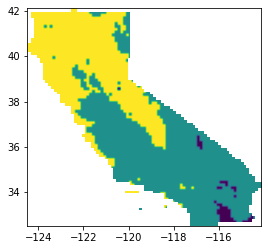

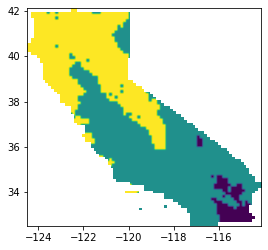

<AxesSubplot:>

In [4]:
# open and plot raster 
# https://rasterio.readthedocs.io/en/latest/quickstart.html#opening-a-dataset-in-reading-mode

arid8 = rasterio.open('arid_regions_2008.tif')
arid19 = rasterio.open('arid_regions_2019.tif')

show(arid8)
show(arid19)

# desert = 1
# dry = 2
# moist = 3

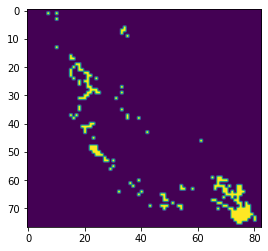

array([0., 1.], dtype=float32)

In [19]:
more_arid = arid8.read(1) -  arid19.read(1)
more_arid = np.where(more_arid<1,False,more_arid) 
more_arid = np.where(more_arid>0,1,more_arid)
show(more_arid)
np.unique(more_arid)

In [ ]:
for i in range(1,8):
    print(i)
    show(thicken_pixels(more_arid,i))

## GROUPING INTO POLYGONS

https://sgillies.net/2014/01/18/getting-shapes-of-raster-features-with-rasterio.html

In [7]:
orig_shp = shapes(more_arid, connectivity = 8)

k=0
for shape, value in orig_shp:
    k = k+1
print('# polygons', k)

# polygons 40


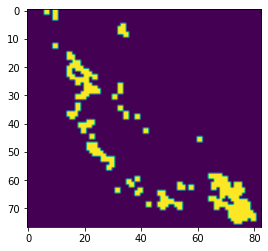

<AxesSubplot:>

In [20]:
# choose connectivity = 8
# https://samirkhanal35.medium.com/relationships-between-pixels-neighbours-and-connectivity-d38e473cd994

thick_regions = thicken_pixels(more_arid,2)
thick_regions = thick_regions.astype('int32')  # shapes function only takes certain int types
show(thick_regions)

In [21]:
np.unique(thick_regions)

array([0, 1], dtype=int32)

In [22]:
thick_shp = shapes(thick_regions, connectivity = 8)
thick_shp  # these generator objects are once-iterable

<generator object shapes at 0x7f6ca498d2e0>

In [ ]:
help(shapes)

In [23]:
# https://stackoverflow.com/questions/1271320/resetting-generator-object-in-python
import pprint

# copy polygons to a list 
geoms = []
for shape, value in thick_shp:
    geoms.append(shape)
    #pprint.pprint(shape)

print('# of polygons',len(geoms))
print('type of element in geoms', type(geoms[0]))


{'coordinates': [[(6.0, 0.0), (6.0, 2.0), (8.0, 2.0), (8.0, 0.0), (6.0, 0.0)]],
 'type': 'Polygon'}
{'coordinates': [[(9.0, 0.0),
                  (9.0, 4.0),
                  (11.0, 4.0),
                  (11.0, 0.0),
                  (9.0, 0.0)]],
 'type': 'Polygon'}
{'coordinates': [[(33.0, 5.0),
                  (35.0, 5.0),
                  (35.0, 8.0),
                  (36.0, 8.0),
                  (36.0, 10.0),
                  (34.0, 10.0),
                  (34.0, 9.0),
                  (32.0, 9.0),
                  (32.0, 6.0),
                  (33.0, 6.0),
                  (33.0, 5.0)]],
 'type': 'Polygon'}
{'coordinates': [[(9.0, 12.0),
                  (9.0, 14.0),
                  (11.0, 14.0),
                  (11.0, 12.0),
                  (9.0, 12.0)]],
 'type': 'Polygon'}
{'coordinates': [[(16.0, 21.0),
                  (16.0, 23.0),
                  (17.0, 23.0),
                  (17.0, 24.0),
                  (20.0, 24.0),
                  (20.

In [24]:
len(geoms)

25

## DEALING WITH A SINGLE POLYGON

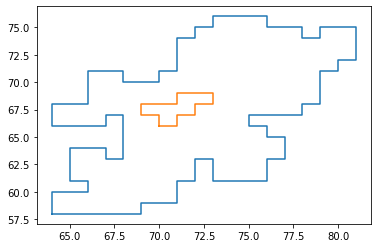

In [117]:
# These coordinates are from one of the polygons in geoms

# exterior boundary
ext = [(64.0, 58.0),
    (69.0, 58.0),
    (69.0, 59.0),
    (71.0, 59.0),
    (71.0, 61.0),
    (72.0, 61.0),
    (72.0, 63.0),
    (73.0, 63.0),
    (73.0, 61.0),
    (76.0, 61.0),
    (76.0, 63.0),
    (77.0, 63.0),
    (77.0, 65.0),
    (76.0, 65.0),
    (76.0, 66.0),
    (75.0, 66.0),
    (75.0, 67.0),
    (78.0, 67.0),
    (78.0, 68.0),
    (79.0, 68.0),
    (79.0, 71.0),
    (80.0, 71.0),
    (80.0, 72.0),
    (81.0, 72.0),
    (81.0, 75.0),
    (79.0, 75.0),
    (79.0, 74.0),
    (78.0, 74.0),
    (78.0, 75.0),
    (76.0, 75.0),
    (76.0, 76.0),
    (73.0, 76.0),
    (73.0, 75.0),
    (72.0, 75.0),
    (72.0, 74.0),
    (71.0, 74.0),
    (71.0, 71.0),
    (70.0, 71.0),
    (70.0, 70.0),
    (68.0, 70.0),
    (68.0, 71.0),
    (66.0, 71.0),
    (66.0, 68.0),
    (64.0, 68.0),
    (64.0, 66.0),
    (67.0, 66.0),
    (67.0, 67.0),
    (68.0, 67.0),
    (68.0, 63.0),
    (67.0, 63.0),
    (67.0, 64.0),
    (65.0, 64.0),
    (65.0, 61.0),
    (66.0, 61.0),
    (66.0, 60.0),
    (64.0, 60.0),
    (64.0, 58.0)]

# inner boundary 
inner =   [(70.0, 66.0),
    (70.0, 67.0),
    (69.0, 67.0),
    (69.0, 68.0),
    (71.0, 68.0),
    (71.0, 69.0),
    (73.0, 69.0),
    (73.0, 68.0),
    (72.0, 68.0),
    (72.0, 67.0),
    (71.0, 67.0),
    (71.0, 66.0),
    (70.0, 66.0)]

# to plot we need to separate x and y coordinates of polygons
xs, ys = zip(*ext) #create lists of x and y values
x2, y2 = zip(*inner) #create lists of x and y values

plt.figure()
plt.plot(xs,ys) 
plt.plot(x2,y2) 
plt.show()

Notice there is something interesting going on here with the coordinates. 

This polygon corresponds to the region in the lower right corner of the raster. 
Coordinates coming from the array/raster are such that (0,0) is on the upper left corner, whereas x,y axes on the plot have (0,0) on the lower left corner. 

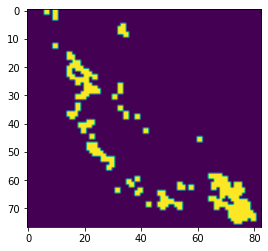

<AxesSubplot:>

In [118]:
show(thick_regions)

## TRANSFORM INTO SHAPELY POLYGONS

https://automating-gis-processes.github.io/CSC/notebooks/L1/geometric-objects.html

To export these polygons will we need to convert them into shapely polygons. Here we see how to do it for a single polygon.

In [102]:
from shapely.affinity  import affine_transform
from shapely.geometry import Polygon
import geopandas as gpd

poly: POLYGON ((64 58, 69 58, 69 59, 71 59, 71 61, 72 61, 72 63, 73 63, 73 61, 76 61, 76 63, 77 63, 77 65, 76 65, 76 66, 75 66, 75 67, 78 67, 78 68, 79 68, 79 71, 80 71, 80 72, 81 72, 81 75, 79 75, 79 74, 78 74, 78 75, 76 75, 76 76, 73 76, 73 75, 72 75, 72 74, 71 74, 71 71, 70 71, 70 70, 68 70, 68 71, 66 71, 66 68, 64 68, 64 66, 67 66, 67 67, 68 67, 68 63, 67 63, 67 64, 65 64, 65 61, 66 61, 66 60, 64 60, 64 58))
Geometry how Python shows it: <class 'shapely.geometry.polygon.Polygon'>


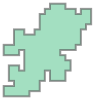

In [119]:
# POLYGON WITHOUT HOLES
# If the polygon does not have any holes, you only need to pass the list of coordinates 
poly = Polygon(ext)

print('poly:', poly)
print("Geometry how Python shows it:", type(poly))
poly

# notice the polygon is still in the incorrect position

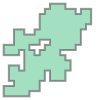

In [52]:
# POLYGON WITH HOLES
# if the polygons have holes, then the polygons that define the holes need to be passes as a list of polygons
poly2 = Polygon(shell=ext, holes=[inner])
poly2

## WRITE SHAPEFILE 

To export these polygons we need to put them into a `GeoDataFrame`.
We will need to add a crs (from the original raster) too.

https://automating-gis-processes.github.io/CSC/notebooks/L2/geopandas-basics.html

In [59]:
# Create an empty geopandas GeoDataFrame
newdata = gpd.GeoDataFrame()
#print(newdata) # verify it is empty

# create a new column called geometry that will contain our Shapely objects
newdata['geometry'] = None
#print(newdata)

# insert data
newdata.loc[0, 'geometry'] = poly2
newdata.loc[1, 'geometry'] = poly
#print(newdata)

In [60]:
# Create a output path for the data
outfp = "/home/jovyan/outlining_regions/trial_polygon.shp"
newdata.to_file(outfp)

In [63]:
verify = gpd.read_file(outfp)
print(verify.head())

   FID                                           geometry
0    0  POLYGON ((64.00000 58.00000, 64.00000 60.00000...
1    1  POLYGON ((64.00000 58.00000, 64.00000 60.00000...


<AxesSubplot:>

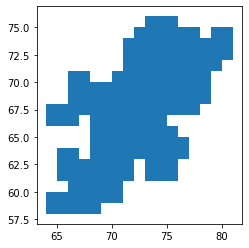

In [64]:
# the polygonis are overlayed that is why we can only see one
# notice we still have the polygon in an "incorrect" position
verify.plot()

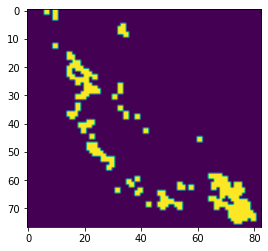

<AxesSubplot:>

In [65]:
show(thick_regions)

## GETTING ARRAY BACK TO RASTER WITH CRS

Here we are going to fix the orientation of the polygons by applying the corresponding affine transformation. 

Affine Transformations @ shapely documentation
https://shapely.readthedocs.io/en/latest/manual.html#affine-transformations

In [120]:
# get the affine transformation form the original raster
print(arid8.transform)

# make aff transformation into a list with the required order
aff_trans = [0.1250005717831325, 0, 0, -0.1250005717792208, -124.500569498, 42.125192691]


| 0.13, 0.00,-124.50|
| 0.00,-0.13, 42.13|
| 0.00, 0.00, 1.00|


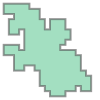

In [121]:
# apply affine transformation --- now it has the correct orientation!
new_poly = affine_transform(poly,aff_trans)
new_poly

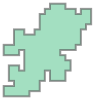

In [75]:
poly

In [111]:
aff_data = gpd.GeoDataFrame()
aff_data.loc[0,'geometry'] = new_poly
print(aff_data)

                                            geometry
0  POLYGON ((-116.50053 34.87516, -115.87553 34.8...


In [114]:
aff_data.crs = arid8.crs
# Create an output path for the data
outfp = "/home/jovyan/outlining_regions/aff_trial_polygon.shp"
aff_data.to_file(outfp)

<AxesSubplot:>

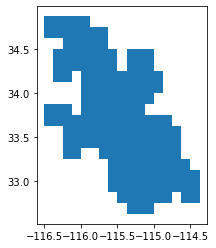

In [113]:
aff_data.plot()

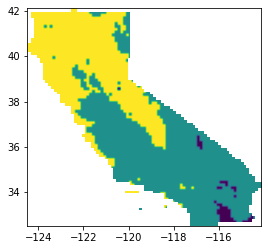

<AxesSubplot:>

In [97]:
show(arid8)

NameError: name 'aff_data' is not defined